In [1]:
from sys import path as sys_path;
from os import path;
from sklearn.datasets import load_iris;
from IPython.display import HTML;
from tabulate import tabulate;

import numpy as np;

iris = load_iris();
labels, data = iris.target, iris.data;

num_samples = len(data);
num_features = len(iris.feature_names);

shuffle = np.random.permutation(num_samples);

data = data[shuffle,:];
labels = labels[shuffle];

class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,5.4,3.7,1.5,0.2
virginica,6.5,3.0,5.5,1.8
setosa,4.4,3.0,1.3,0.2
virginica,7.7,3.0,6.1,2.3
setosa,4.9,3.1,1.5,0.1
virginica,6.3,2.5,5.0,1.9
setosa,5.4,3.9,1.3,0.4
versicolor,5.1,2.5,3.0,1.1
setosa,5.3,3.7,1.5,0.2
setosa,4.8,3.0,1.4,0.3


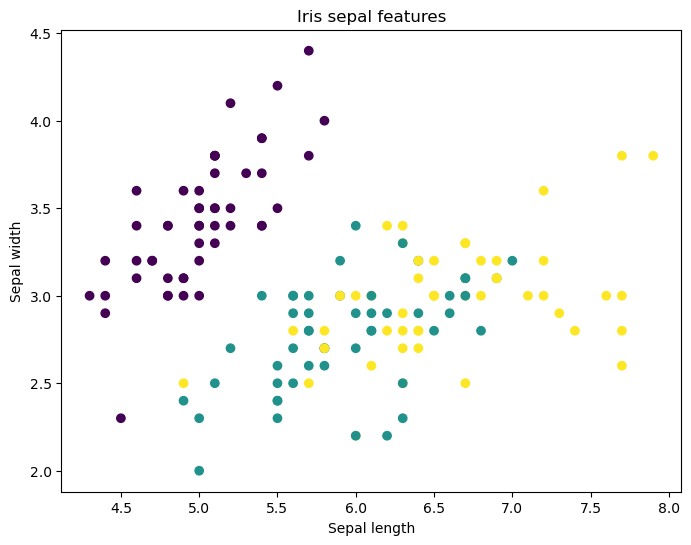

In [2]:
import matplotlib.pyplot as plt;

label_names = np.array([iris.target_names[l] for l in labels]);
headers = np.array(['class'] + iris.feature_names).reshape(1, 1 + num_features);
classes = iris.target_names;

rows = np.concatenate([np.array(label_names).reshape(num_samples, 1), data], axis=1);
table = np.concatenate([headers, rows], axis=0);

display(HTML(tabulate(table[:20], tablefmt='html')));

x, y, lbls = data[:,0], data[:,1], labels;
plt.figure(figsize=(8, 6));
plt.scatter(x, y, c=lbls);
plt.xlabel('Sepal length');
plt.ylabel('Sepal width');
plt.title('Iris sepal features');

the closest iris type is "versicolor"


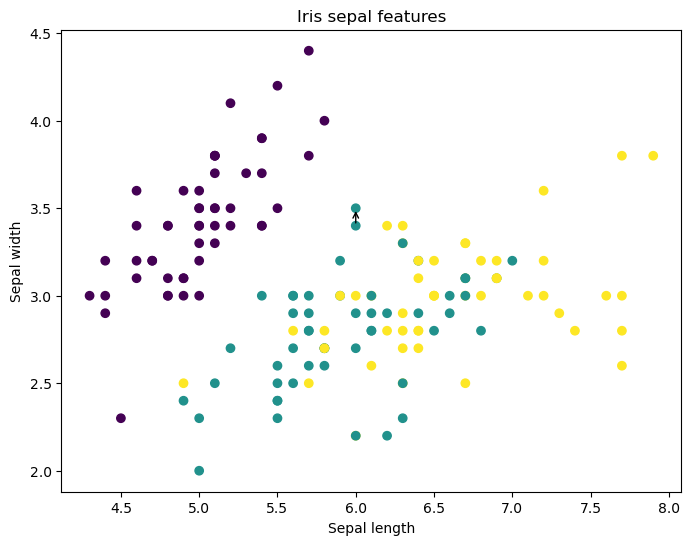

In [3]:
# Here we have 3 possible classes, therefore it is not a binary classifier,
#   and the approach to be used below is to find the point closest to a given one
#   and assign its' class to it

new_x = 6;
new_y = 3.5;

distances = np.sum((data[:,0:2] - [new_x, new_y])**2, axis=1);
the_closest = np.argmin(distances);
the_closest_label = labels[the_closest];
the_closest_label_name = iris.target_names[the_closest_label];

print(f'the closest iris type is "{the_closest_label_name}"');

# So that's the k-nearest neighbor, where k=1. If k > 1, then we should fine k nearest points and take a vote among them

x = np.append(x, new_x);
y = np.append(y, new_y);
lbls = np.append(lbls, the_closest_label);

plt.figure(figsize=(8, 6));
plt.scatter(x, y, c=lbls);
plt.xlabel('Sepal length');
plt.ylabel('Sepal width');
plt.title('Iris sepal features');
plt.annotate(
    '',
    xytext=(x[the_closest], y[the_closest]),
    xy=(new_x, new_y),
    arrowprops={'arrowstyle':'->'});